# sklearnを使ってk-nnを試してみる

## データの読み込みと可視化

sklearnという機械学習ライブラリから、wine dataを読み込んで可視化までしてみます。

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_wine

データセットをsklearnから読み込みます。

In [2]:
wine_sklearn = load_wine()

wine_sklearn

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

slearnから読み込んだ段階だと辞書型になっているので、pd.DataFrameに変換する

In [3]:
data = pd.DataFrame(
    data = wine_sklearn.data,
    columns=wine_sklearn.feature_names,
)
data["target"] = [wine_sklearn.target_names[t] for t in wine_sklearn.target]

In [4]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


データの統計値を表にしてみましょう。

In [5]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


seabornの関数を使ってデータを可視化します。

下の結果を見ると分かる通り、このsns.pairplotは特徴数が多いと見づらくなるので注意してください。

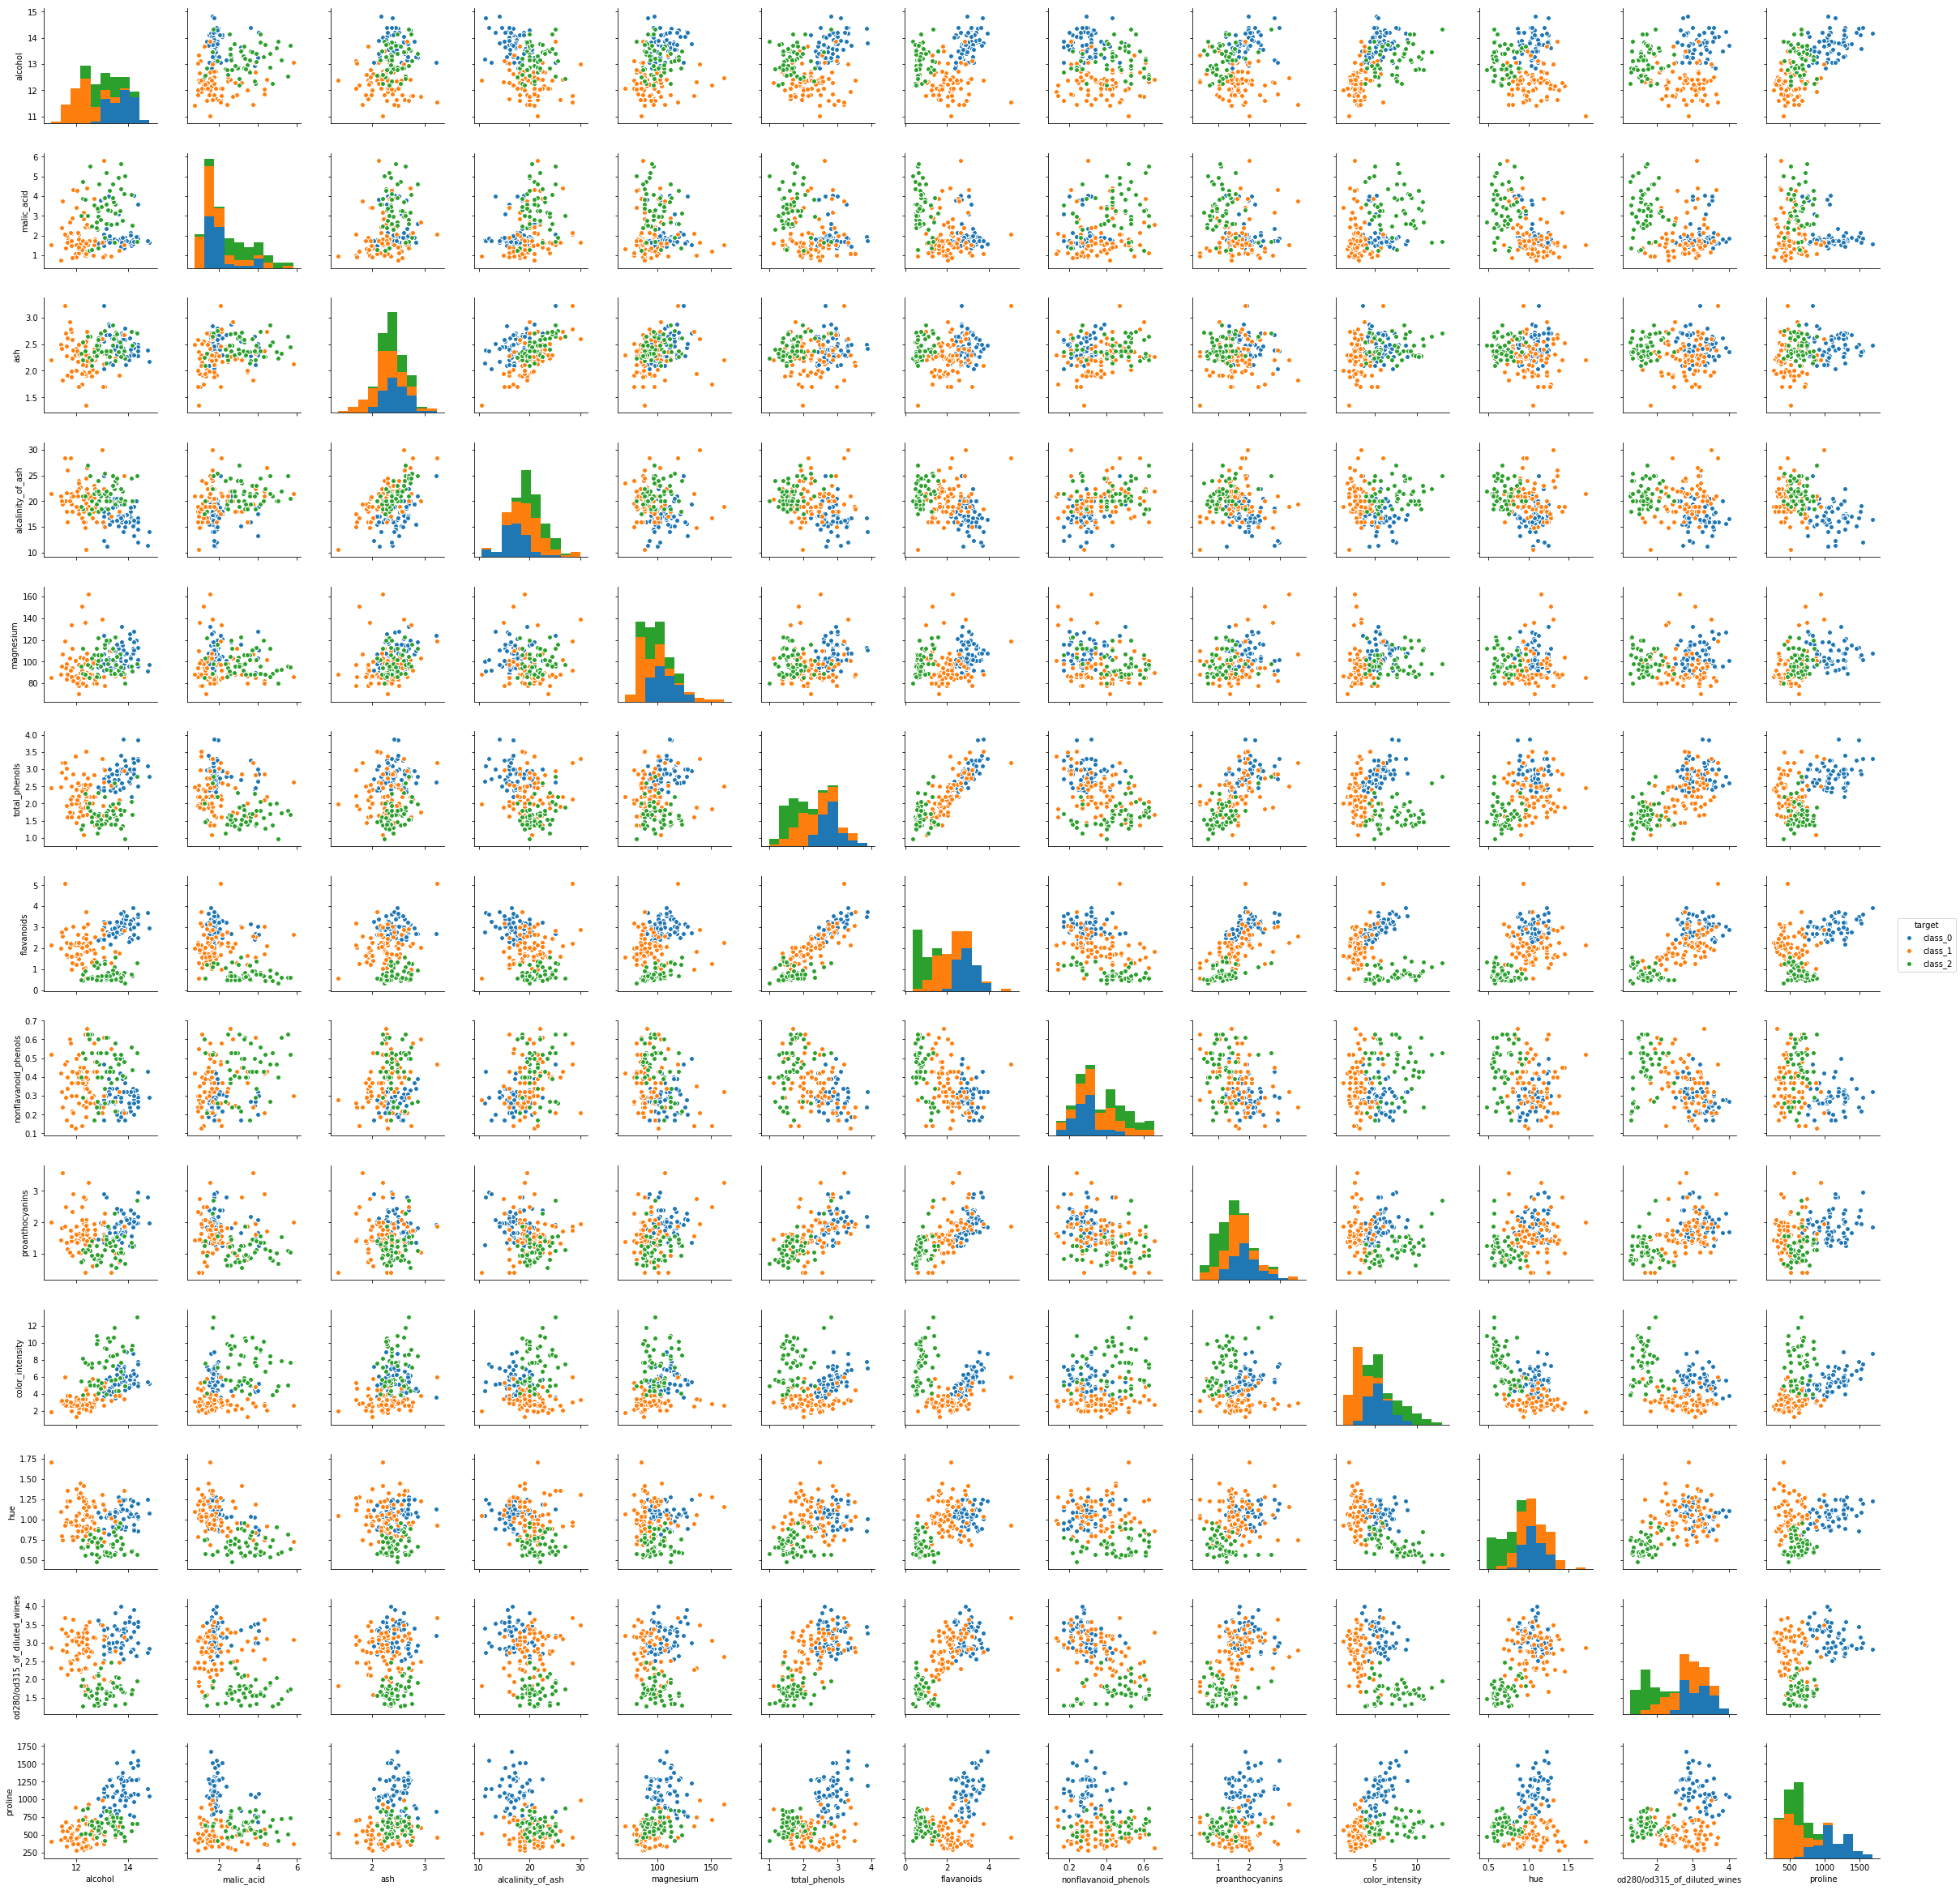

In [6]:
sns.pairplot(data, hue="target")

## 教師データとテストデータの作成

ランダムにデータをシャッフル

In [7]:
data = data.sample(frac=1).reset_index(drop=True)

data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,class_0
1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
2,13.56,1.71,2.31,16.2,117.0,3.15,3.29,0.34,2.34,6.13,0.95,3.38,795.0,class_0
3,12.08,1.39,2.50,22.5,84.0,2.56,2.29,0.43,1.04,2.90,0.93,3.19,385.0,class_1
4,11.76,2.68,2.92,20.0,103.0,1.75,2.03,0.60,1.05,3.80,1.23,2.50,607.0,class_1


教師データとテストデータの境目を決めておきましょう。

このノートブックでは全体の80％を教師データ、残り20％をテストデータとしました。

In [8]:
use_row_limit = int(data.shape[0] * 0.8)

f"全データが{data.shape[0]}個、そのうち{use_row_limit}個目までを教師データとして使う"

'全データが178個、そのうち142個目までを教師データとして使う'

In [9]:
use_column=list(range(data.shape[1]))[:-1]

f"全列が{data.shape[1]}個、そのうち{use_column}番目にあたる列が特徴にあたる"

'全列が14個、そのうち[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]番目にあたる列が特徴にあたる'

In [10]:
train_data = data.iloc[:use_row_limit,:]

print(train_data.shape)
train_data.head()

(142, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,class_0
1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
2,13.56,1.71,2.31,16.2,117.0,3.15,3.29,0.34,2.34,6.13,0.95,3.38,795.0,class_0
3,12.08,1.39,2.50,22.5,84.0,2.56,2.29,0.43,1.04,2.90,0.93,3.19,385.0,class_1
4,11.76,2.68,2.92,20.0,103.0,1.75,2.03,0.60,1.05,3.80,1.23,2.50,607.0,class_1


In [11]:
test_data = data.iloc[use_row_limit:,:]

print(test_data.shape)
test_data.head()

(36, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
142,13.87,1.90,2.80,19.4,107.0,2.95,2.97,0.37,1.76,4.50,1.25,3.40,915.0,class_0
143,13.07,1.50,2.10,15.5,98.0,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020.0,class_0
144,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,class_2
145,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620.0,class_2
146,14.19,1.59,2.48,16.5,108.0,3.30,3.93,0.32,1.86,8.70,1.23,2.82,1680.0,class_0


## sklearn.neighbors.KNeighborsClassifierを使ってクラス分類

sklearnのKNeighborsClassifier(knn)でクラス分類を行います。

ここで、knnの引数は
- n_neighbors: k近傍のkの値
- n_jobs: k-meansを何並列にするか(-1ならばpcのコア数分だけ並列してくれます）

In [12]:
from sklearn.neighbors import KNeighborsClassifier as KNN

1.KNNのインスタンスを作成

In [13]:
knn = KNN(n_neighbors=3, n_jobs=-1)

2.KNNインスタンスに教師データをセット

In [14]:
knn.fit(
    X = train_data.iloc[:,use_column].values, 
    y = train_data["target"].values,
)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
           weights='uniform')

In [15]:
pred_target =knn.predict(
    X = test_data.iloc[:,use_column].values, 
)

pred_target

array(['class_0', 'class_0', 'class_2', 'class_1', 'class_0', 'class_2',
       'class_0', 'class_1', 'class_2', 'class_1', 'class_0', 'class_0',
       'class_0', 'class_2', 'class_1', 'class_2', 'class_1', 'class_1',
       'class_0', 'class_0', 'class_1', 'class_2', 'class_0', 'class_2',
       'class_0', 'class_1', 'class_0', 'class_1', 'class_2', 'class_1',
       'class_1', 'class_0', 'class_1', 'class_0', 'class_2', 'class_2'],
      dtype=object)

クラス分類の結果を確認してみましょう。

クラス分類の正答率は”認識率”(=accuracy)で表されます。

$acc = \frac{正答数}{データの数}$

accはテストデータだけで計算します。  
値が1に近ければ近いだけ嬉しいです。

In [16]:
# acc: 認識率

sum(test_data["target"] == pred_target) / len(pred_target)

0.6111111111111112

この例ではあんまり良い性能ではありませんね。  
パラメータ（例えばn_neighborsの値）を変えて、いい値が出るように調整してみてください。